# Importing necessary libraries

In [3]:
#Linear algebra
import numpy as np

#Dataframes and processing
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

#Regression algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score,confusion_matrix



# Loading both the datasets


In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# Checking the dataset

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

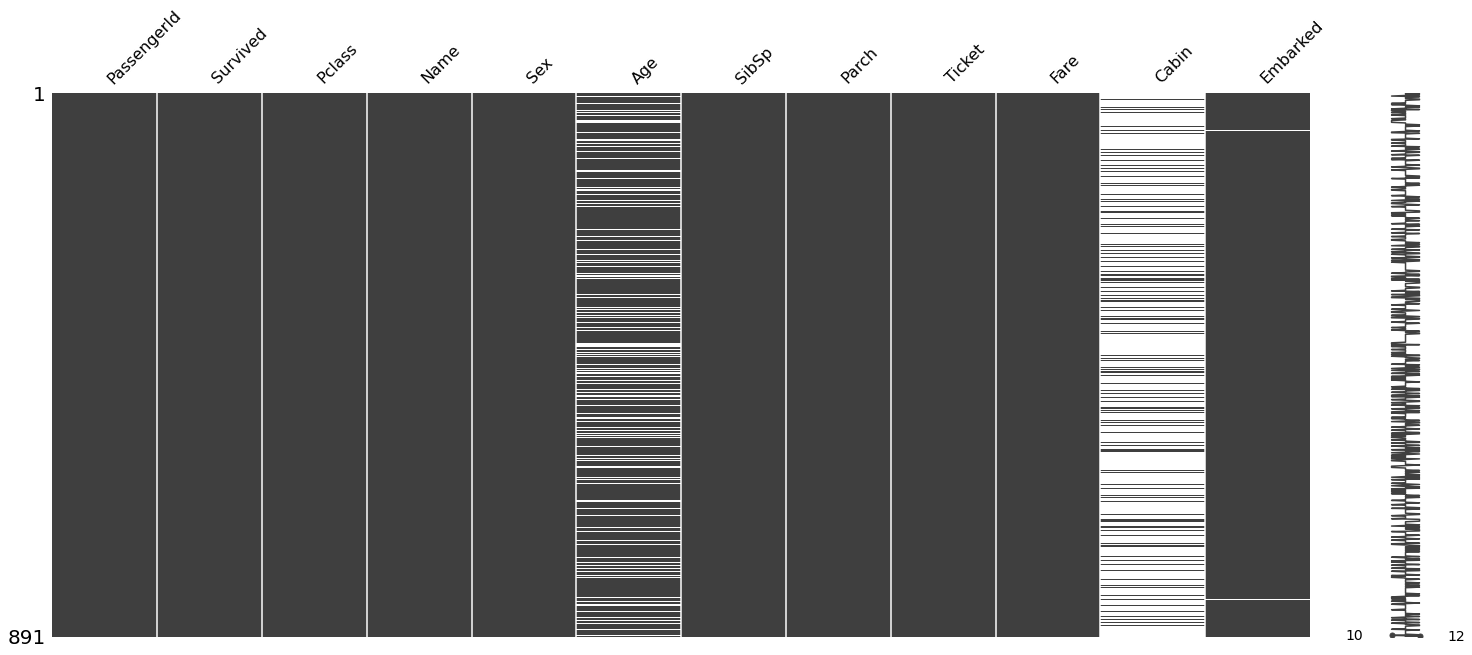

In [13]:
#Visualizing the missing values
import missingno
missingno.matrix(train_df)


<AxesSubplot:>

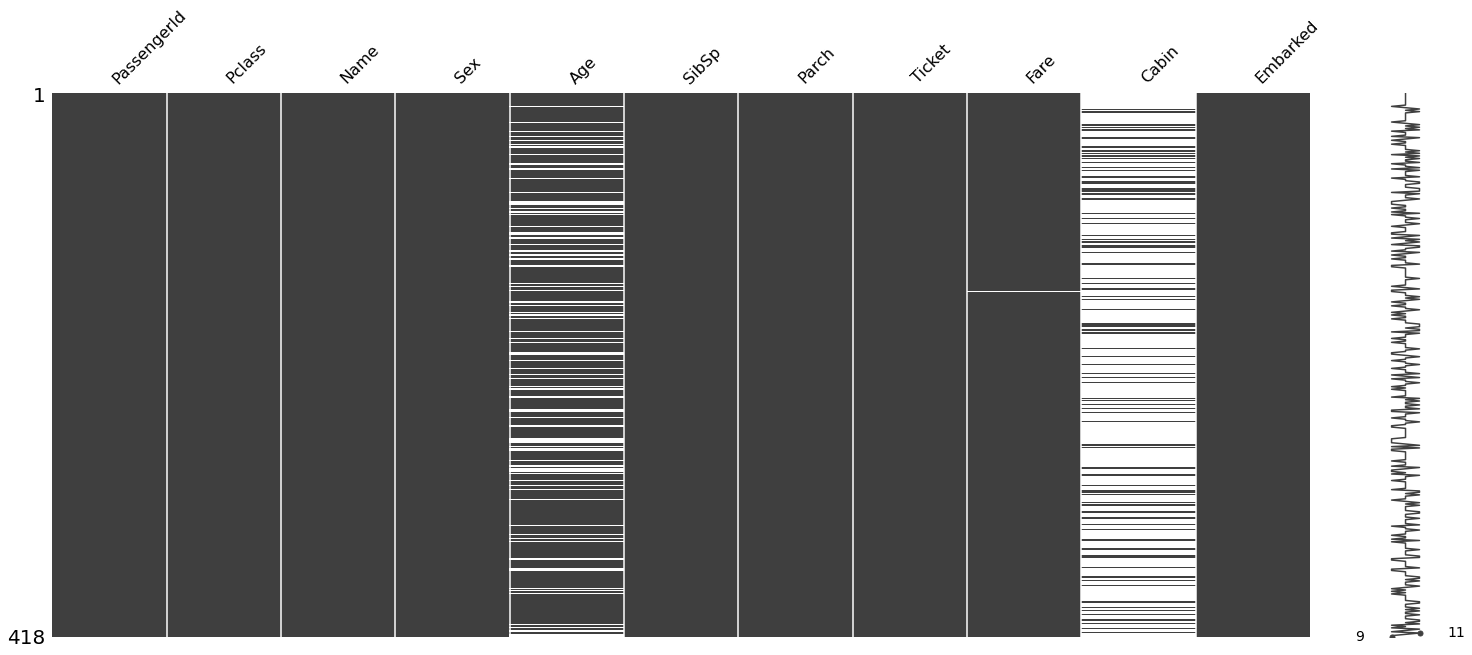

In [14]:
missingno.matrix(test_df)

In [15]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Potentially significant features = 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Cabin', 'Embarked'

# Visualizing the data

### Survived vs Sex

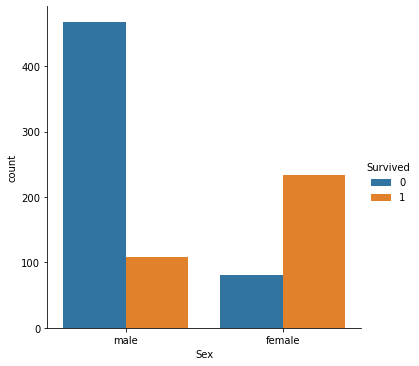

In [16]:
#Visualizing survived vs sex
sns.catplot(x = "Sex", hue = "Survived", data = train_df, kind = "count")


Looking at the above graph we can cearly see that majority i.e around 70% of the people who survived were females.
Thus we can say that Sex is a significant feature which can be used in our model.

### Survived vs Pclass

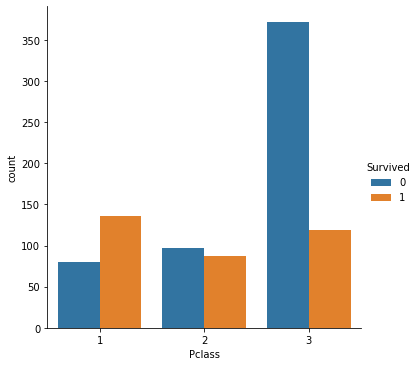

In [17]:
#Visualizing Pclass vs Survived
sns.catplot(x = "Pclass", hue = "Survived", data = train_df, kind = "count")

The above graph indicates that people with higher class tickets had a higher rate of survival. This is another significant feature.

### Survived vs Age

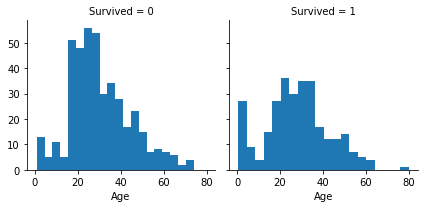

In [18]:
#Visualizing Survived vs Age
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20) 

### Survived vs Embarked

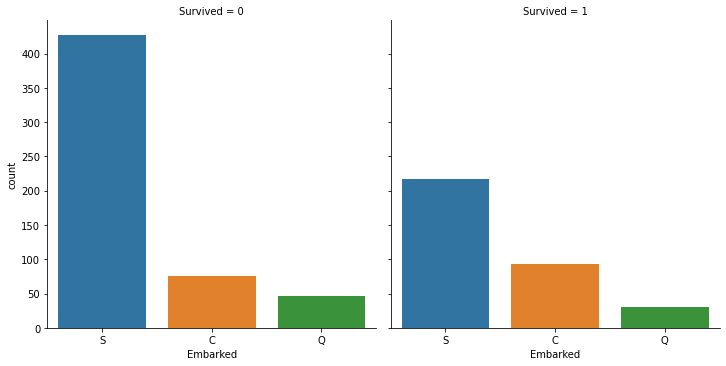

In [19]:
#Visualizing Embarked vs Survived
sns.catplot(x = "Embarked", col = "Survived", data = train_df, kind = "count")

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


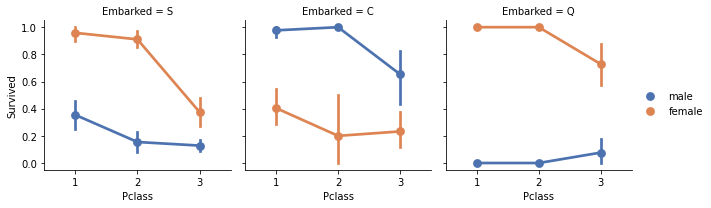

In [20]:
#Visualizing Embarked vs Survived with Pclass and Sex
g = sns.FacetGrid(train_df, col="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = "deep")
g.add_legend()

Females who embarked from S and Q have higher rate of survival but this cannot be said about females who embarked from C. Also, Females from Pclass 1 and 2 show a higher rate of survival compared to class 3.
Males who embarked from port C have an overall higher rate of survival compared tho others.



### Survived vs Fare

As Fare is a continous variable we can convert that into bins. For simplicity we will convert fare into 4 intervals and then label these classes. We will perform this on both our data sets i.e train_df and test_df so we first combine these datasets and then continue with our visualization.


# Data Manipulation

We start with removing unwanted columns which are 'Cabin', 'PassengerId', 'Ticket' and then combining the dataset

In [21]:
train_df = train_df.drop(["Ticket", "Cabin", "PassengerId"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin", "PassengerId"], axis=1)
combine = [train_df, test_df]

We try to extract any usefull information from any features. From Name feature we try to extract the title of the person.

In [22]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df["Title"], train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We replace some titles as Rare

In [23]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don",
                                                 "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Now we remap these titles into numbers 

In [24]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset["Title"] = dataset["Title"].fillna(0)
    
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now that we have extracted some information from the Name column we can drop the Name column from the dataset.

In [25]:
train_df = train_df.drop(["Name"], axis=1)
test_df = test_df.drop(["Name"], axis=1)
combine = [train_df, test_df]

In [26]:
combine

[     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0           0       3    male  22.0      1      0   7.2500        S      1
 1           1       1  female  38.0      1      0  71.2833        C      3
 2           1       3  female  26.0      0      0   7.9250        S      2
 3           1       1  female  35.0      1      0  53.1000        S      3
 4           0       3    male  35.0      0      0   8.0500        S      1
 ..        ...     ...     ...   ...    ...    ...      ...      ...    ...
 886         0       2    male  27.0      0      0  13.0000        S      5
 887         1       1  female  19.0      0      0  30.0000        S      2
 888         0       3  female   NaN      1      2  23.4500        S      2
 889         1       1    male  26.0      0      0  30.0000        C      1
 890         0       3    male  32.0      0      0   7.7500        Q      1
 
 [891 rows x 9 columns],
      Pclass     Sex   Age  SibSp  Parch      Fare Embarked  

Remaping sex into 0's and 1's

In [27]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Now we try to tackle the missing values in the age column

Using median values for Age across sets of Pclass and Gender feature combinations.

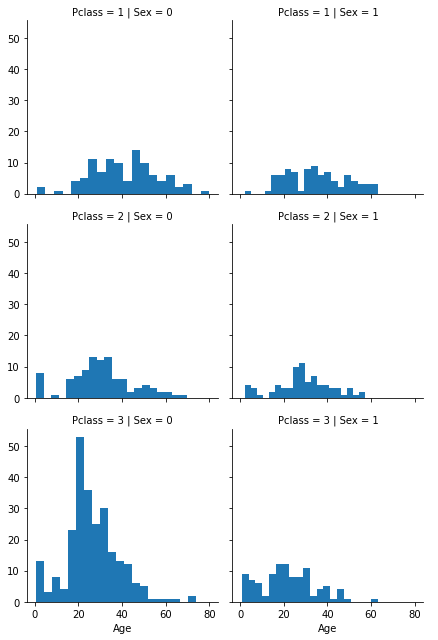

In [28]:
g = sns.FacetGrid(train_df, row = "Pclass", col = "Sex")
g.map(plt.hist, "Age", bins = 20)
g.add_legend()

In [29]:
guess_age = np.zeros((2,3))
guess_age


array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset["Sex"] == i) & (dataset["Pclass"] == j+1)]["Age"].dropna()
            
            age_guess = guess_df.median()
            
            # Converting the float age to the nearest 0.5
            guess_age[i, j] = int(age_guess/0.5 +0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), "Age"] = guess_age[i, j]
    
    dataset["Age"] = dataset["Age"].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us now create classes for age which we can then use for our model

In [31]:
train_df["AgeClass"] = pd.cut(train_df["Age"], 5)
train_df[["AgeClass", "Survived"]].groupby(["AgeClass"], as_index = False).mean().sort_values(by = "AgeClass", ascending = True)

,AgeClass,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [32]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeClass
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,25,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,54,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,2,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,27,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,14,1,0,30.0708,C,3,"(-0.08, 16.0]"


Now we convert these Classes into lables which we can use in our model

In [33]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeClass
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]"
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]"


In [34]:
train_df = train_df.drop(["AgeClass"], axis = 1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


We can convert SibSp and Parch into one single feature. We start off with making a column named FamilyMem which is the number of family members.

In [35]:
for dataset in combine:
    dataset["FamilyMem"] = dataset["SibSp"] + dataset["Parch"] + 1
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMem
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


Now we add another feature names IsAlone which indicates if the person was travellong alone or with family.

In [36]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilyMem"] >= 1, "IsAlone"] = 1
    
train_df.head(10)    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMem,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,1
1,1,1,1,2,1,0,71.2833,C,3,2,1
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,1
4,0,3,0,2,0,0,8.0500,S,1,1,1
5,0,3,0,1,0,0,8.4583,Q,1,1,1
6,0,1,0,3,0,0,51.8625,S,1,1,1
7,0,3,0,0,3,1,21.0750,S,4,5,1
8,1,3,1,1,0,2,11.1333,S,3,3,1
9,1,2,1,0,1,0,30.0708,C,3,2,1


Now we can drop the other columns which are no longer necessary.
    1. SibSp
    2. Parch
    3. FamilyMem

In [37]:
train_df = train_df.drop(["SibSp", "Parch", "FamilyMem"], axis = 1)
test_df = test_df.drop(["SibSp", "Parch", "FamilyMem"], axis = 1)

combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,3,1
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,1
4,0,3,0,2,8.0500,S,1,1


Now we can create Classes for Fare feature but first we have to impute
the 1 missing value of fare from the test_df

In [38]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace = True)

Now can proceed with creating Fare Classes

In [39]:
train_df["FareClass"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareClass", "Survived"]].groupby(["FareClass"], as_index = False).mean().sort_values(by = "FareClass", ascending = True)


,FareClass,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareClass
0,0,3,0,1,7.2500,S,1,1,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,C,3,1,"(31.0, 512.329]"
2,1,3,1,1,7.9250,S,2,1,"(7.91, 14.454]"
3,1,1,1,2,53.1000,S,3,1,"(31.0, 512.329]"
4,0,3,0,2,8.0500,S,1,1,"(7.91, 14.454]"
5,0,3,0,1,8.4583,Q,1,1,"(7.91, 14.454]"
6,0,1,0,3,51.8625,S,1,1,"(31.0, 512.329]"
7,0,3,0,0,21.0750,S,4,1,"(14.454, 31.0]"
8,1,3,1,1,11.1333,S,3,1,"(7.91, 14.454]"
9,1,2,1,0,30.0708,C,3,1,"(14.454, 31.0]"


In [41]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31.0), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31.0, "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareClass
0,0,3,0,1,0,S,1,1,"(-0.001, 7.91]"
1,1,1,1,2,3,C,3,1,"(31.0, 512.329]"
2,1,3,1,1,1,S,2,1,"(7.91, 14.454]"
3,1,1,1,2,3,S,3,1,"(31.0, 512.329]"
4,0,3,0,2,1,S,1,1,"(7.91, 14.454]"


In [42]:
train_df = train_df.drop(["FareClass"], axis = 1)

combine = [train_df, test_df]

combine

[     Survived  Pclass  Sex  Age  Fare Embarked  Title  IsAlone
 0           0       3    0    1     0        S      1        1
 1           1       1    1    2     3        C      3        1
 2           1       3    1    1     1        S      2        1
 3           1       1    1    2     3        S      3        1
 4           0       3    0    2     1        S      1        1
 ..        ...     ...  ...  ...   ...      ...    ...      ...
 886         0       2    0    1     1        S      5        1
 887         1       1    1    1     2        S      2        1
 888         0       3    1    1     2        S      2        1
 889         1       1    0    1     2        C      1        1
 890         0       3    0    1     0        Q      1        1
 
 [891 rows x 8 columns],
      Pclass  Sex  Age  Fare Embarked  Title  IsAlone
 0         3    0    2     0        Q      1        1
 1         3    1    2     0        S      3        1
 2         2    0    3     1        Q      

Now we Impute the 2 missing values form the Embarked column with the Mode of the observations

In [43]:
train_df["Embarked"].fillna(train_df["Embarked"].dropna().mode()[0], inplace = True)

In [44]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,1
1,1,1,1,2,3,1,3,1
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,1
4,0,3,0,2,1,0,1,1


# Model Fitting

### Logistic regression

In [45]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]

X_test = test_df.copy()

In [46]:
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)

In [47]:
accuracy_log = logistic.score(X_train, Y_train)
accuracy_log

0.8103254769921436

Using Logistic regression model we get an accuracy score of 81%

### K nearest neighbours

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [49]:
accuracy_knn = knn.score(X_train, Y_train)
accuracy_knn

0.8439955106621774

### Decision Tree 

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [51]:
accuracy_dec_tree = decision_tree.score(X_train, Y_train)
accuracy_dec_tree

0.8597081930415263

### Random Forest

In [52]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [53]:
accuracy_ran_forest = random_forest.score(X_train, Y_train)
accuracy_ran_forest

0.8597081930415263